<a href="https://colab.research.google.com/github/MINAADELMARKOS/SuperHerosAnalysis/blob/main/Superheors_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Pyspark**

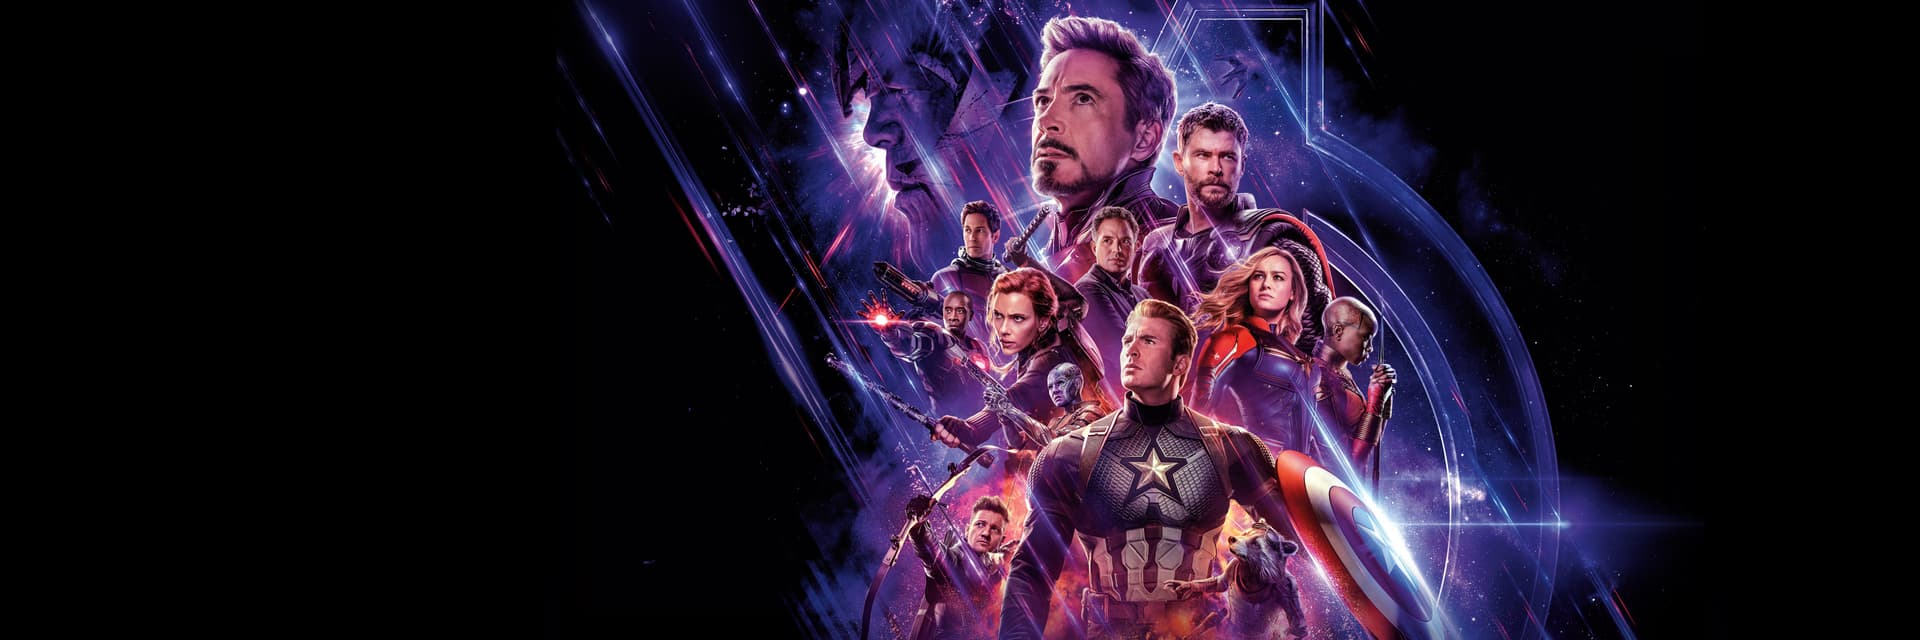

In [2]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=b6b619f4a833566f9232620cacffb27110d88aff6642413f1b8c8d30c1927f96
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.types import Row
from pyspark.sql.functions import desc
from pyspark.sql.functions import avg

In [4]:
spark = SparkSession \
        .builder  \
        .appName("Analyzing Marvel Character Data") \
        .getOrCreate()

In [5]:
sqlContext = SQLContext(spark)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [6]:
characters_info = "/content/drive/MyDrive/Python_Learn /superheroes_info.csv"
characters_stats = "/content/drive/MyDrive/Python_Learn /superheroes_stats.csv"

In [7]:
characters = spark.read\
                  .format("csv")\
                  .option("header","true")\
                  .load(characters_info)

In [8]:
characters.show(4)

+---+---------------+--------+------+------+---------+-----+------+------+--------+---------+---------+-------------+------+-----------+---------------+--------------+
|_c0|           Name|Identity|Status|Gender|Alignment| Race|Height|Weight|EyeColor|HairColor|SkinColor|    Publisher|  Year|Appearances|FirstAppearance|AdditionalData|
+---+---------------+--------+------+------+---------+-----+------+------+--------+---------+---------+-------------+------+-----------+---------------+--------------+
|  0|     Spider-Man|  Secret|Living|  Male|     Good|Human| 178.0|  74.0|   Hazel|    Brown|     NULL|Marvel Comics|1962.0|     4043.0|     1962-08-01|  Peter Parker|
|  1|     Spider-Man|  Secret|Living|  Male|     Good|Human| 178.0|  77.0|     Red|    Brown|     NULL|Marvel Comics|1962.0|     4043.0|     1962-08-01|  Peter Parker|
|  2|     Spider-Man|  Secret|Living|  Male|     Good|Human| 157.0|  56.0|   Brown|    Black|     NULL|Marvel Comics|1962.0|     4043.0|     1962-08-01|  Peter 

In [9]:
characters.columns

['_c0',
 'Name',
 'Identity',
 'Status',
 'Gender',
 'Alignment',
 'Race',
 'Height',
 'Weight',
 'EyeColor',
 'HairColor',
 'SkinColor',
 'Publisher',
 'Year',
 'Appearances',
 'FirstAppearance',
 'AdditionalData']

In [10]:
characters = characters.drop(
                                '_c0',
                                'Alignment',
                                'Race',
                                'Height',
                                'Weight',
                                'EyeColor',
                                'HairColor',
                                'SkinColor',


)

In [11]:
characters.show(4)

+---------------+--------+------+------+-------------+------+-----------+---------------+--------------+
|           Name|Identity|Status|Gender|    Publisher|  Year|Appearances|FirstAppearance|AdditionalData|
+---------------+--------+------+------+-------------+------+-----------+---------------+--------------+
|     Spider-Man|  Secret|Living|  Male|Marvel Comics|1962.0|     4043.0|     1962-08-01|  Peter Parker|
|     Spider-Man|  Secret|Living|  Male|Marvel Comics|1962.0|     4043.0|     1962-08-01|  Peter Parker|
|     Spider-Man|  Secret|Living|  Male|Marvel Comics|1962.0|     4043.0|     1962-08-01|  Peter Parker|
|Captain America|  Public|Living|  Male|Marvel Comics|1941.0|     3360.0|     1941-03-01| Steven Rogers|
+---------------+--------+------+------+-------------+------+-----------+---------------+--------------+
only showing top 4 rows



In [12]:
characters = characters.filter(characters.Gender != 'NA')

In [13]:
characters.show(4)

+---------------+--------+------+------+-------------+------+-----------+---------------+--------------+
|           Name|Identity|Status|Gender|    Publisher|  Year|Appearances|FirstAppearance|AdditionalData|
+---------------+--------+------+------+-------------+------+-----------+---------------+--------------+
|     Spider-Man|  Secret|Living|  Male|Marvel Comics|1962.0|     4043.0|     1962-08-01|  Peter Parker|
|     Spider-Man|  Secret|Living|  Male|Marvel Comics|1962.0|     4043.0|     1962-08-01|  Peter Parker|
|     Spider-Man|  Secret|Living|  Male|Marvel Comics|1962.0|     4043.0|     1962-08-01|  Peter Parker|
|Captain America|  Public|Living|  Male|Marvel Comics|1941.0|     3360.0|     1941-03-01| Steven Rogers|
+---------------+--------+------+------+-------------+------+-----------+---------------+--------------+
only showing top 4 rows



# **Temporary view Shared across the session**

In [14]:
characters.createOrReplaceTempView("hero")

In [15]:
spark.catalog.listTables()

[Table(name='hero', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]

In [16]:
avengers = spark.sql('select * from hero')

avengers.columns

['Name',
 'Identity',
 'Status',
 'Gender',
 'Publisher',
 'Year',
 'Appearances',
 'FirstAppearance',
 'AdditionalData']

In [17]:
powers = spark.read\
              .format("csv")\
              .option("header","true")\
              .load(characters_stats)

In [18]:
powers.show(4)

+----------+---------+------------+--------+-----+----------+-----+------+-----+
|      Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+----------+---------+------------+--------+-----+----------+-----+------+-----+
|   3-D Man|     good|        50.0|    31.0| 43.0|      32.0| 25.0|  52.0|233.0|
|    A-Bomb|     good|        38.0|   100.0| 17.0|      80.0| 17.0|  64.0|316.0|
|Abe Sapien|     good|        88.0|    14.0| 35.0|      42.0| 35.0|  85.0|299.0|
|  Abin Sur|     good|        50.0|    90.0| 53.0|      64.0| 84.0|  65.0|406.0|
+----------+---------+------------+--------+-----+----------+-----+------+-----+
only showing top 4 rows



In [19]:
powers.columns

['Name',
 'Alignment',
 'Intelligence',
 'Strength',
 'Speed',
 'Durability',
 'Power',
 'Combat',
 'Total']

In [20]:
powers = powers.filter(powers.Alignment != 'NA')

In [21]:
powers.show(4)

+----------+---------+------------+--------+-----+----------+-----+------+-----+
|      Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+----------+---------+------------+--------+-----+----------+-----+------+-----+
|   3-D Man|     good|        50.0|    31.0| 43.0|      32.0| 25.0|  52.0|233.0|
|    A-Bomb|     good|        38.0|   100.0| 17.0|      80.0| 17.0|  64.0|316.0|
|Abe Sapien|     good|        88.0|    14.0| 35.0|      42.0| 35.0|  85.0|299.0|
|  Abin Sur|     good|        50.0|    90.0| 53.0|      64.0| 84.0|  65.0|406.0|
+----------+---------+------------+--------+-----+----------+-----+------+-----+
only showing top 4 rows



In [22]:
powers = powers.drop('Durability','Combat','Total')

In [23]:
powers.show(8)

+------------+---------+------------+--------+-----+-----+
|        Name|Alignment|Intelligence|Strength|Speed|Power|
+------------+---------+------------+--------+-----+-----+
|     3-D Man|     good|        50.0|    31.0| 43.0| 25.0|
|      A-Bomb|     good|        38.0|   100.0| 17.0| 17.0|
|  Abe Sapien|     good|        88.0|    14.0| 35.0| 35.0|
|    Abin Sur|     good|        50.0|    90.0| 53.0| 84.0|
| Abomination|      bad|        63.0|    80.0| 53.0| 55.0|
|     Abraxas|      bad|        88.0|   100.0| 83.0|100.0|
| Adam Monroe|     good|        63.0|    10.0| 12.0| 71.0|
|Adam Strange|     good|        NULL|    NULL| NULL| NULL|
+------------+---------+------------+--------+-----+-----+
only showing top 8 rows



In [24]:
from pyspark.sql.types import IntegerType

powers = powers.withColumn("Intelligence",powers["Intelligence"].cast(IntegerType()))\
               .withColumn("Strength",powers["Strength"].cast(IntegerType()))\
               .withColumn("Speed",powers["Speed"].cast(IntegerType()))\
               .withColumn("Power",powers["Power"].cast(IntegerType()))

In [25]:
powers.show(2)

+-------+---------+------------+--------+-----+-----+
|   Name|Alignment|Intelligence|Strength|Speed|Power|
+-------+---------+------------+--------+-----+-----+
|3-D Man|     good|          50|      31|   43|   25|
| A-Bomb|     good|          38|     100|   17|   17|
+-------+---------+------------+--------+-----+-----+
only showing top 2 rows



In [26]:
characters.count(), powers.count()

(22808, 608)

In [27]:
characters_count = spark.sql("select count(*) from hero")

In [28]:
spark.catalog.listTables()

[Table(name='hero', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]

In [29]:
powers.show(1)

+-------+---------+------------+--------+-----+-----+
|   Name|Alignment|Intelligence|Strength|Speed|Power|
+-------+---------+------------+--------+-----+-----+
|3-D Man|     good|          50|      31|   43|   25|
+-------+---------+------------+--------+-----+-----+
only showing top 1 row



In [30]:
# Filter the dataset:

powerful_heros = powers.filter((powers.Strength >= 30) & (powers.Power > 40))

In [31]:
powerful_heros.show(1)

+--------+---------+------------+--------+-----+-----+
|    Name|Alignment|Intelligence|Strength|Speed|Power|
+--------+---------+------------+--------+-----+-----+
|Abin Sur|     good|          50|      90|   53|   84|
+--------+---------+------------+--------+-----+-----+
only showing top 1 row



In [32]:
# Select the desired columns:
powerful_heros = powerful_heros.select("Name", "Alignment", "Intelligence", "Strength", "Power")

In [33]:
powerful_heros.show(2)

+-----------+---------+------------+--------+-----+
|       Name|Alignment|Intelligence|Strength|Power|
+-----------+---------+------------+--------+-----+
|   Abin Sur|     good|          50|      90|   84|
|Abomination|      bad|          63|      80|   55|
+-----------+---------+------------+--------+-----+
only showing top 2 rows



In [34]:
# Create temp view

powerful_heros.createOrReplaceTempView("powerful_heroes_view")

In [35]:
# The Top 50 hero's power
powerful_heros.orderBy(powerful_heros.Power.desc()).show(50)

+-----------------+---------+------------+--------+-----+
|             Name|Alignment|Intelligence|Strength|Power|
+-----------------+---------+------------+--------+-----+
|          Abraxas|      bad|          88|     100|  100|
|       Air-Walker|      bad|          50|      85|  100|
|            Amazo|      bad|          75|     100|  100|
|     Anti-Monitor|      bad|          88|      90|  100|
|       Apocalypse|      bad|         100|     100|  100|
|    Beta Ray Bill|     good|          63|      80|  100|
|         Beyonder|     good|          88|     100|  100|
|       Black Bolt|     good|          75|      67|  100|
|            Cable|     good|          88|      48|  100|
|  Cyborg Superman|      bad|          75|      93|  100|
|         Darkseid|      bad|          88|     100|  100|
|         Doomsday|      bad|          88|      80|  100|
|         Dormammu|      bad|          88|      95|  100|
|     Dr Manhattan|     good|          88|      32|  100|
|           Ex

In [36]:
# count powerful heros

powerful_heroes_count = spark.sql("select count(Power) from powerful_heroes_view")
powerful_heroes_count.show()

+------------+
|count(Power)|
+------------+
|         164|
+------------+



In [37]:
powerful_heroes_count.collect()[0][0]

164

In [38]:
power_percent = powerful_heroes_count.collect()[0][0] / powerful_heroes_count.collect()[0][0]*100

In [39]:
power_percent

100.0

In [40]:
powers.columns

['Name', 'Alignment', 'Intelligence', 'Strength', 'Speed', 'Power']

In [41]:
powers.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Alignment: string (nullable = true)
 |-- Intelligence: integer (nullable = true)
 |-- Strength: integer (nullable = true)
 |-- Speed: integer (nullable = true)
 |-- Power: integer (nullable = true)



In [42]:
powers.show(1)

+-------+---------+------------+--------+-----+-----+
|   Name|Alignment|Intelligence|Strength|Speed|Power|
+-------+---------+------------+--------+-----+-----+
|3-D Man|     good|          50|      31|   43|   25|
+-------+---------+------------+--------+-----+-----+
only showing top 1 row



In [43]:
# chars_overview = spark.sql("SELECT * FROM powers " +
#                            "JOIN characters on characters.Name = powers.Name " +
#                            "ORDER by Intelligence DESC").drop(characters.Name)

# chars_overview.show()

In [44]:
# intel_per_alignment = spark.sql("SELECT Alignment,Intelligence FROM powers") \
#                           .groupBy("Alignment") \
#                           .agg(avg("Intelligence").alias("Average_Intelligence"))

In [45]:
# intel_per_aligment = spark.sql("select Alignment,Intelligence from powers")\
#                           .groupBy("Alignment")\
#                           .agg({"Intelligence":"avg"})\
#                           .withColumnRenamed("avg(Intelligence)","Intelligence")